# MECH 383 - Applied Electronics and Instrumentation
# Lab Information and Rules 

 
 
1. All labs are to be scheduled ahead of time, at the beginning of the semester. 

2. For in-person labs, all team members must be present for labs. Absences or time changes from scheduled labs need to be pre-arranged for valid reasons. 

3. It is strongly recommended to complete pre-labs before your experiment time. Pre-labs are handed in together with the experiment and lab report. 

4. Lab report due dates are given on the course syllabus. 

5. Please submit your lab as a Jupyter notebook that can be run. If your submission relies on additional files to run correctly, it is the responsibility of the student to ensure that all files are included with the submission and named correctly.

6. Labs are graded based on the output of each code block. Code that throws errors, supresses output, or otherwise results in **no printed output may not receive points**.

7. Each lab will be handed in on behalf of the group by one group member.

**HINT**: To help ensure your notebook runs as expected, restart the kernel and re-run each cell sequentially.

In [60]:
import numpy as np
import math
import matplotlib

# Libraries needed for PySpice
import PySpice
import PySpice.Logging.Logging as Logging
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *

The following websites might be helpful:
* https://www.python.org/
* https://numpy.org/
* https://matplotlib.org/
* https://pyspice.fabrice-salvaire.fr/pages/documentation.html


# MECH 383 - Lab 1


© Instructor-generated course materials (e.g., handouts, notes, summaries, exam questions, etc.) are protected by law and may not be copied or distributed in any form or in any medium without explicit permission of the instructor. 


##### Group Number: TBD
<br> Names: Zhi Ji Li, Simon Vaillant
<br>
<br> Collaborators: (not sure what this is)
<br>
<br> Grade:  ________________/62

## Experiment 1: Pre-Lab [Total: 12 points]

#### Part A - Basic Measurements

To avoid confusion from repeated variable names, all code variables are given a subscript. In Part A, VDC_A ...etc.

In [61]:
VDC_A = 15 
R1_A = 27
R2_A = 33


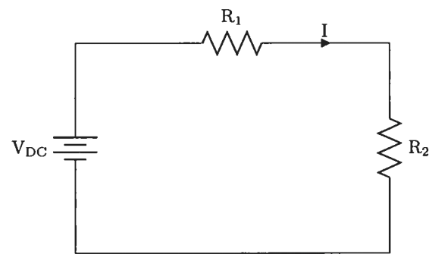

<center>Figure 1: Circuit Diagram for Part A</center>

1. Calculate and print all voltages and the current in the circuit. [4 points]

In [62]:
## Show your calculations here in terms of variables above

I_calcA = VDC_A/(R1_A + R2_A) #Total potential difference divided by the total resistance
VR1_calcA = I_calcA * R1_A
VR2_calcA = I_calcA * R2_A

## Use print() to display your final answer 
'''print('VR1_calcA =',VR1_calcA,'V') 
print('VR2_calcA =',VR2_calcA,'V')
print('I_calcA =',I_calcA,'A')''' #verify that this is necessary, these two segments are redundant

print('VR1_calcA = %s V, VR2_calcA = %s V, I_calcA = %s A'%(VR1_calcA, VR2_calcA, I_calcA))

VR1_calcA = 6.75 V, VR2_calcA = 8.25 V, I_calcA = 0.25 A


#### Part B - Maximmum Power Transfer

In [63]:
VDC_B = 15
R1_B = 1000

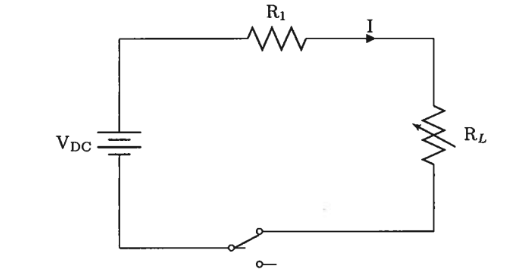

<center>Figure 2: Circuit Diagram for Part C</center>

2. At what load resistance RL is power transfer maximized? [1 point]

In [64]:
## Show your calculations here
"""
I = VDC/(RL + R1)


Current through circuit is constant:

PL(RL) = IL * VL = I^2 * RL = VDC^2 * RL / (RL + R1)^2
For VDC = 15 V and R1 = 1000 Ω, the function PL(R_L) has a local maximum at PL(1000):
d/dRL [PL(RL)] = -VDC^2 * (RL - R1) / (RL + R1)^3 = 0
RL = R1 = 1000
"""

RL_calcB = R1_B # I think this is basically impedance matching from AC circuits

## Use print() to display your final answer

print('RL_calcB =',RL_calcB,'Ω')

RL_calcB = 1000 Ω


3. What is the maximum power transferred to the load resistance? [3 points]

In [65]:
## Show your calculations here

"""
PL(1000) = 15^2 * 1000 / (1000 + 1000)^2 = 0.05625 W
"""

Pmax_calcB = VDC_B**2 * RL_calcB / (RL_calcB + R1_B)**2

## Use print() to display your final answer

print('Pmax_calcB =',Pmax_calcB,'W')

Pmax_calcB = 0.05625 W


4. What is the percent efficiency η at that load when power transfer is maximized? [4 points]
<br>*Hint: $η$ = $P_{L}$/$P_{tot}$ x 100%*

In [66]:
## Show your calculations here

"""
Supplied power depends on dissipation through R1 and RL
Therefore P_total = 2*I*VDC = VDC^2/(RL+R1)
"""
n_calcB = Pmax_calcB/(VDC_B**2/(RL_calcB+R1_B))*100

## Use print() to display your final answer

print('n_calcB =',n_calcB,'%')

n_calcB = 50.0 %


## PySpice Experiment: Part A - Basic Measurements [Total: 10 points]

Hint: https://pyspice.fabrice-salvaire.fr/pages/documentation.html might be helpful for this and the following section.

5. In PySpice, create the circuit shown in Fig. 3 using PySpice for $V_{DC}$ = 15V, $R_{1}$ = 27Ω, and $R_{2}$ = 33Ω. The labels 'in', 'node1', and circuit.gnd are suggested names for the nodes needed when building the circuit with PySpice. [5 points]

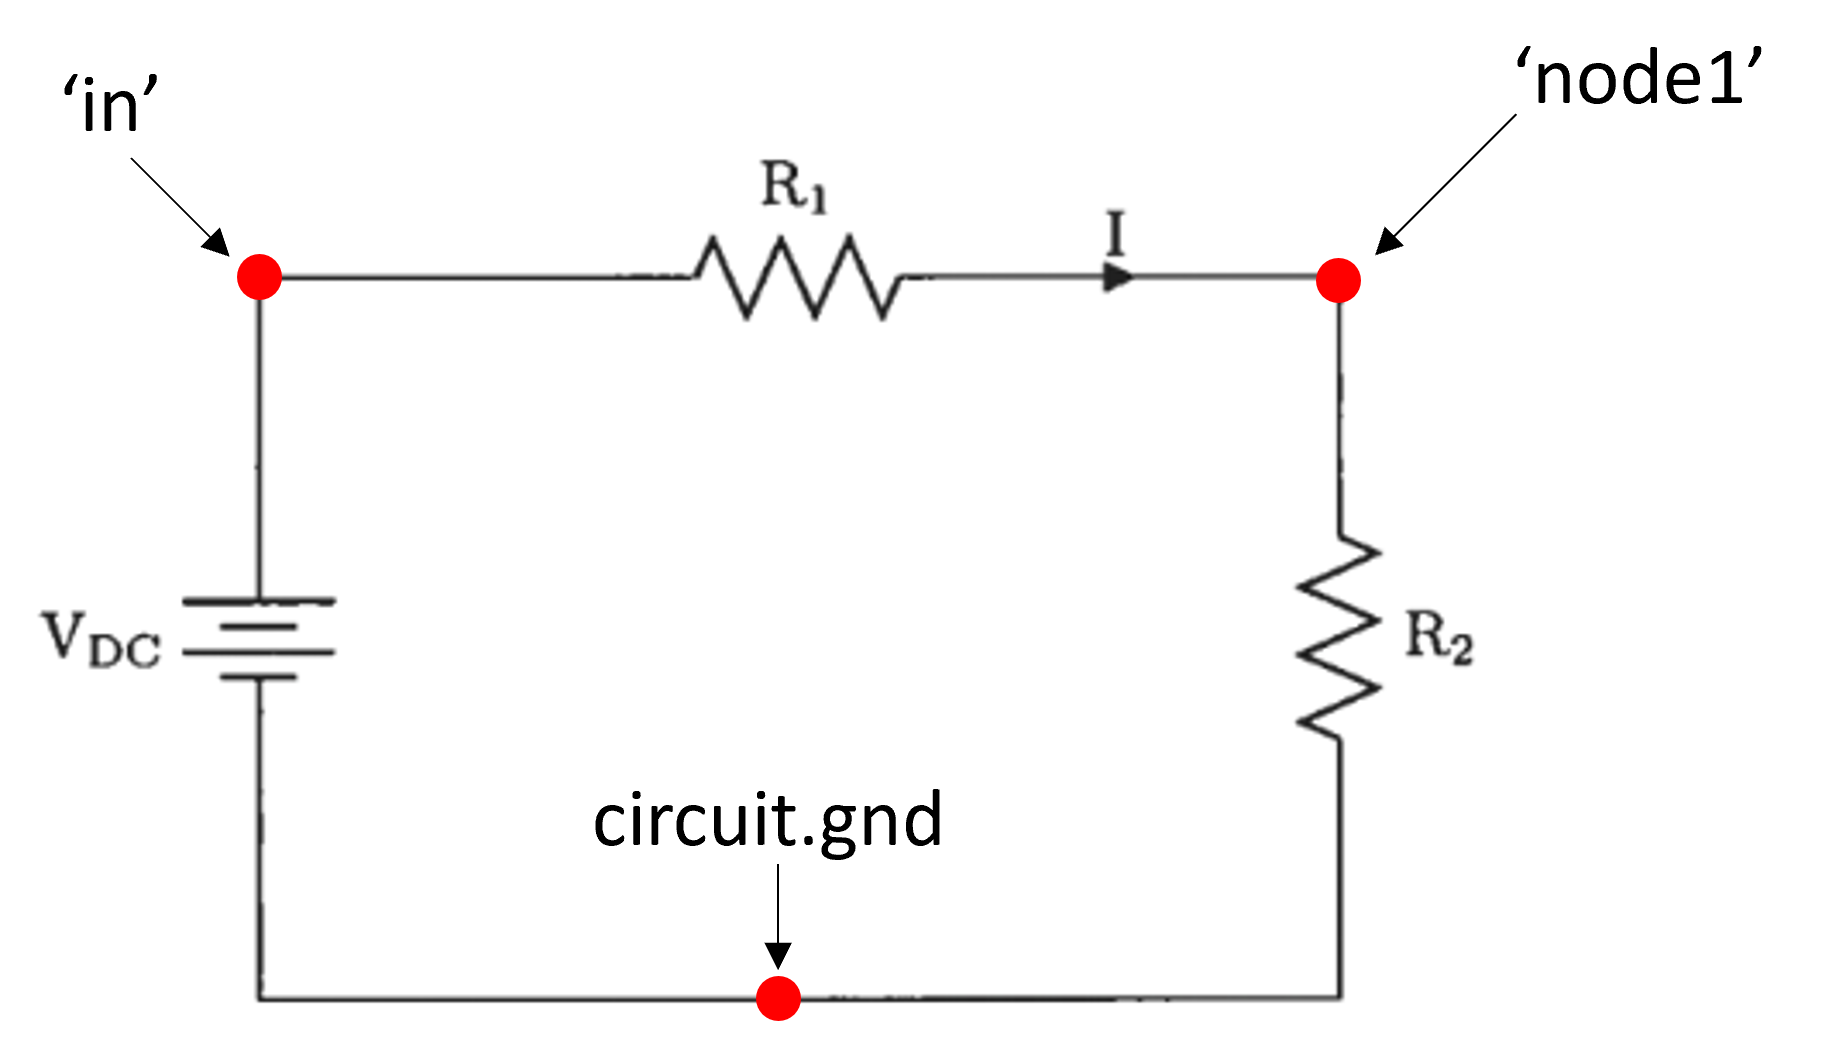

<center>Figure 3: Circuit diagram for Part A</center>

In [67]:
## Setup circuit for simulation

# Define variables
VDC_A = 15
R1_A = 27
R2_A = 33

# Initiate logger
logger = Logging.setup_logging()    

# Create circuit
circuit_A = Circuit('Part A')

# Add components to the circuit
# You must add the voltage source and two resistors
# Syntax hints: 
# Voltage Source: circuit.V('input', Node name for V+, circuit.gnd (this is name of the ground node), Source Voltage)
# Resistor: circuit.R(Number, input Node, output Node, Resistance Value

# Source example: circuit.V('input', 'in', circuit.gnd, 10@u_V) # @u_V tells PySpice the units are volts
# Resistor example: circuit.R(1, 'in', 'node1', 100@u_Ohm)
# Check what nodes each component connects to in Fig. 4

circuit_A.V('input', 'in', circuit.gnd, VDC_A@u_V)
circuit_A.R(1, 'in', 'node_1', R1_A@u_Ohm)
circuit_A.R(2, 'node_1', circuit.gnd, R2_A@u_Ohm)

# Setup simulator
simulator_A = circuit_A.simulator(temperature = 25, nominal_temperature = 25)    # These are standard values

# Run analysis
analysis_A = simulator_A.operating_point()    # Simulates the circuit

# Display your results (Source voltage, node 1 voltage)
print('Source Voltage:', analysis_A.nodes['in'][0]) # Select element i=0 to avoid deprecation warning
print('Node 1 Voltage:', analysis_A.nodes['node_1'][0])

# Future note: it does not like capital letters for node names


Source Voltage: 15.0 V
Node 1 Voltage: 8.25 V


6. Using PySpice's nodal analysis, measure the voltage supplied by the power supply and calculate the voltage across each resistor. Print your results. [5 points]

In [68]:
## Define your variables here

VDC_measA = analysis.nodes['in'][0]
VR1_measA = analysis.nodes['node_1'][0]
VR2_measA = VDC_measA - VR1_measA

## Use print() to display your final answer

print('VDC_measA =',VDC_measA)
print('VR1_measA =',VR1_measA)
print('VR2_measA =',VR2_measA)

VDC_measA = 15.0 V
VR1_measA = 8.25 V
VR2_measA = 6.75 V


## PySpice Experiment: Part B - Maximum Power Transfer [Total: 10 points]

7. In Part B, you will determine the maximum power transfer for the circuit shown in Fig. 4. The potentiometer, $R_{L}$, will be modelled simply as a resistor which will have its value changed programatically through a for-loop.

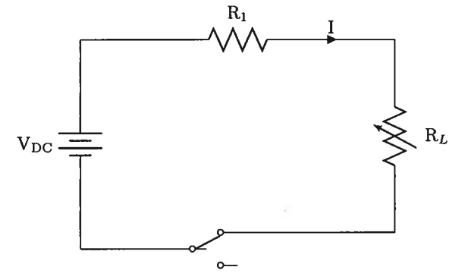

<center>Figure 4: Circuit diagram for Part B</center>

8. Create a numpy array for the desired $R_{L}$ values. The potentiometer values should increase by 100Ω, starting at 100Ω and increasing to 800Ω. From 800Ω to 1200Ω, decrease the step size to 50Ω. Increase the step size back to 100Ω after 1200Ω until you obtain at least 30 different $R_{L}$ values. Print your array. [1 point]

In [ ]:
## Define R_L array
R_L = np.array([])

r = 100
for i in range(30):
    R_L=np.append(R_L, r)
    if r >= 800 and r < 1200:
        r += 50
        continue
    r += 100

## Use print() to display your final answer
print(R_L)
# print(np.size(R_L))


[ 100.  200.  300.  400.  500.  600.  700.  800.  850.  900.  950. 1000.
 1050. 1100. 1150. 1200. 1300. 1400. 1500. 1600. 1700. 1800. 1900. 2000.
 2100. 2200. 2300. 2400. 2500. 2600.]


9. Using PySpice, create the circuit shown in Fig. 5 for $V_{DC}$ = 15V, $R_{1}$ = 1kΩ, and $R_{L}$ (with voltage $V_{RL}$ across it) as the potentiometer. Change $V_{RL}$ programatically using a for-loop and store each value in an array. [8 points]

In [70]:
## Setup circuit for simulation. This section should include a for-loop. V_RL should be calculated in each loop iteration and saved to an array

# Define variables, including zero-filled array
VDC_B = 15
R1_B = 1000
V_RL = np.zeros(len(R_L))

# For loop to simulate the circuit with each potentiometer value
for i in range(len(R_L)):
    # Initiate logger
    logger_B = Logging.setup_logging()    

    # Create circuit
    circuit_B = Circuit('Part B')

    # Add components to the circuit
    circuit_B.V('input', 'in', circuit_B.gnd, VDC_B@u_V)
    circuit_B.R(1, 'in', 'node_1', R1_B@u_Ohm)
    circuit_B.R(2, 'node_1', circuit_B.gnd, R_L[i]@u_Ohm)

    # Setup simulator
    simulator_B = circuit_B.simulator(temperature = 25, nominal_temperature = 25)

    # Run analysis
    analysis_B = simulator_B.operating_point() 
    
    # Voltage across potentiometer, be sure to save to an array
    V_RL[i] = analysis_B.nodes['node_1'][0]


10. Print the arrays for $R_L$ and $V_{RL}$ as columns. [1 point]

In [71]:
## Rearrange your array rows as columns
np.set_printoptions(suppress=True) # Prevents printing in scientific notation

RL_col = R_L[:,None]
VRL_col = V_RL[:,None]

print('RL(Ω) VRL(V)')
print((np.hstack((RL_col,VRL_col))))

RL(Ω) VRL(V)
[[ 100.            1.36363636]
 [ 200.            2.5       ]
 [ 300.            3.46153846]
 [ 400.            4.28571429]
 [ 500.            5.        ]
 [ 600.            5.625     ]
 [ 700.            6.17647059]
 [ 800.            6.66666667]
 [ 850.            6.89189189]
 [ 900.            7.10526316]
 [ 950.            7.30769231]
 [1000.            7.5       ]
 [1050.            7.68292683]
 [1100.            7.85714286]
 [1150.            8.02325581]
 [1200.            8.18181818]
 [1300.            8.47826087]
 [1400.            8.75      ]
 [1500.            9.        ]
 [1600.            9.23076923]
 [1700.            9.44444444]
 [1800.            9.64285714]
 [1900.            9.82758621]
 [2000.           10.        ]
 [2100.           10.16129032]
 [2200.           10.3125    ]
 [2300.           10.45454545]
 [2400.           10.58823529]
 [2500.           10.71428571]
 [2600.           10.83333333]]


## Experiment 1: Lab Report [25 points]

#### Part A

11. Using the measured values, calculate and print the current $I$. [2.5 points]

In [75]:
## Show your calculations here

I_postA = VDC_A / (R1_A + R2_A)

## Use print() to display your final answer

print('I_postA =',I_postA,'A')

I_postA = 0.25 A


12. If you were to conduct this experiment using real components would you expect the nominal and measured currents to be exaclty the same? Why? [2.5 points]

*Type your answer here*

#### Part B

13. Calculate $P_{L}$, $P_{tot}$, and $η$ for each row each potentiometer resistance value. Print $R_L$, $V_{RL}$, $P_{L}$, $P_{tot}$, and $η$ as columns. [5 points] 
<br>*Hint: $P$ = $VI$ = $V^{2}/R$ and $η$ = $P_{L}$/$P_{tot}$ x 100%*

In [73]:
## Calculate PL. Hint: use np.power(), np.multiply(), or np.divide()

PL_measB = 

## Calculate Ptot

Ptot_measB = 

## Calculate n

n_measB = 

## Rearrange the array rows as columns and output as a 'table'
## Use print() to display your final answer

PL_col = PL_measB[:,None]
Ptot_col = Ptot_measB[:,None]
n_col = n_measC[:,None]
print('RL(Ω) VRL(V) PL(W) Ptot(W) n(%)')
print(np.hstack((RL_col,VRL_col,PL_col,Ptot_col,n_col)))

SyntaxError: invalid syntax (1880545096.py, line 3)

14. What is the maximum power transferred to (dissipated in load resistor)? Plot the Load Power vs Load Resistance and analyse the graph. Print the maximum power transferred. [3 points]

In [ ]:
## To import the pyplot graphing library from matplotlib
import matplotlib.pyplot as plt

## Put Load Resistance on the x-axis
## Put Load Power on the y-axis

## To plot your graph
plt.plot(x,y)

## To identify the titles and axes
plt.title("TITLE")
plt.xlabel("X-AXIS")
plt.ylabel("Y-AXIS")

## To display your graph
plt.show()

*Type your answer here*

15. Plot the Efficiency vs Load Resistance and change the colour of the graph. [3 points]

In [ ]:
## Plot your graph here

16. For what load is power transfer maximized? Plot your results from 2. and 3. on the same graph and analyse your results. Print the load which results in maximum power transfer. [4 points]

In [ ]:
## Plot your graph here

*Type your answer here*

17. Why are the circuits rarely compared under maximum power transfer conditions? [5 points]

*Type your answer here*

## References [5 points]

Please share any resources that you used (ex: Stack Overflow, official documentation, myCourses forum, etc) and the names of anyone you worked with. For resources, provide a URL where necessary. For collaborators, note which sections were done collaboratively; failure to do so may result in a grade of 0/5 for references.

*Include your references here*